In [661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import matplotlib as mpl
import matplotlib.font_manager as fm

In [662]:
font_path = "./FormaDJRCyrillicDeck-Regular-Testing.otf"

# Регистрируем шрифт
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

# Устанавливаем шрифт глобально через rcParams
mpl.rcParams["font.family"] = prop.get_name()
mpl.rcParams["font.sans-serif"] = [prop.get_name()]

mpl.rcParams.update({
    # Цвет текста (подписи, заголовки, оси, метки)
    "text.color": "#481B00",
    "axes.labelcolor": "#481B00",
    "axes.titlecolor": "#481B00",
    "xtick.color": "#481B00",
    "ytick.color": "#481B00",
    "axes.edgecolor": "#481B00",
    
    # Цвет фона графика и фигуры
    "figure.facecolor": "#FFF6E6",
    "axes.facecolor": "#FFF6E6",
    "savefig.facecolor": "#FFF6E6",
})

### убираем ненужные колонки

In [663]:
df = pd.read_csv('bts_v13.csv', encoding='utf-16')

df = df.drop(columns=['id', 'spotify_track_id', 'spotify_album_id', 'eng_lyrics_source_url', 'eng_lyrics_credits', 'raw_track_title', 'featured'], errors='ignore') 
#слишком много было пустых ячеек, от 80% датасета, не будут полезными; также удалила айди, они не информативны
df.head(10)

,album_title,eng_album_title,album_rd,album_seq,track_title,eng_track_title,lyrics,hidden_track,remix,performed_by,...,spotify_track_key,spotify_track_loudness,spotify_track_mode,spotify_track_speechiness,spotify_track_acousticness,spotify_track_instrumentalness,spotify_track_liveness,spotify_track_valence,spotify_track_tempo,spotify_track_time_signature
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),Intro: 2 Cool 4 Skool (ft. DJ Friz),we're now going to progress to some steps\nwhi...,False,False,RM,...,8.0,-6.249,1.0,0.2450,0.1790,0.266000,0.1790,0.532,94.871,4.0
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,BTS,...,8.0,-5.090,0.0,0.1600,0.0104,0.000006,0.1340,0.868,144.020,4.0
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,BTS,...,9.0,-18.009,1.0,0.8020,0.9120,0.000000,0.9130,0.817,121.045,3.0
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,No More Dream,"hey, what's your dream?\n hey, what's your dre...",False,False,BTS,...,2.0,-5.185,1.0,0.4700,0.0118,0.000002,0.4310,0.594,167.898,4.0
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,Interlude,NaN,False,False,BTS,...,1.0,-13.392,0.0,0.3190,0.4940,0.762000,0.3920,0.854,125.897,4.0
5,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,6,좋아요 (I Like It),I Like It,wanna be loved‚Ä¶\n\ndon't wanna be fool wanna...,False,False,BTS,...,0.0,-4.165,0.0,0.0705,0.3030,0.000000,0.2600,0.783,100.939,4.0
6,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,7,Outro: Circle Room Cypher,Outro: Circle Room Cypher,"hurry up, hurry-hurry-hurry-hurry-hurry-hurry-...",False,False,BTS,...,7.0,-11.608,1.0,0.5230,0.5360,0.000000,0.1890,0.852,94.077,4.0
7,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,8,Skit: On The Start Line,Skit: On The Start Line,"ah-ah\ntrainee\nin many ways, this term define...",True,False,BTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,9,길 (Road/Path),Road/Path,"yeah, wassup\nyou know, time flows like stars\...",True,False,BTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"O!RUL8,2?","O!RUL8,2?",2013-09-11,1,"Intro: O!RUL8,2?","Intro: O!RUL8,2?",nothing lasts forever\nyou only live once\nso ...,False,False,RM,...,7.0,-5.029,1.0,0.3930,0.2720,0.000000,0.0945,0.188,150.140,4.0


### смотрим на пропуски

Заполним медианой численные значения, т.к. пропусков немного (23), а данных у нас достаточно

In [664]:
df.isnull().sum()


album_title                        0
eng_album_title                    0
album_rd                           0
album_seq                          0
track_title                        0
eng_track_title                    0
lyrics                            31
hidden_track                       0
remix                              0
performed_by                      23
repackaged                         0
lang                              22
has_full_ver                       0
is_alt_lang_ver                    0
spotify_track_duration_ms         23
spotify_track_danceability        23
spotify_track_energy              23
spotify_track_key                 23
spotify_track_loudness            23
spotify_track_mode                23
spotify_track_speechiness         23
spotify_track_acousticness        23
spotify_track_instrumentalness    23
spotify_track_liveness            23
spotify_track_valence             23
spotify_track_tempo               23
spotify_track_time_signature      23
d

In [665]:
spotify_cols = [
    'spotify_track_duration_ms',
    'spotify_track_danceability',
    'spotify_track_energy',
    'spotify_track_key',
    'spotify_track_loudness',
    'spotify_track_mode',
    'spotify_track_speechiness',
    'spotify_track_acousticness',
    'spotify_track_instrumentalness',
    'spotify_track_liveness',
    'spotify_track_valence',
    'spotify_track_tempo',
    'spotify_track_time_signature'
]

for col in spotify_cols:
    df[col] = df[col].fillna(df[col].median())

Посмотрим на пустые колонки с текстом песен

In [666]:
empty_lyrics_df = df[df['lyrics'].isnull() | (df['lyrics'].str.strip() == '')]
print(empty_lyrics_df)


                                     album_title  \
4                                 2 Cool 4 Skool   
21                              Skool Luv Affair   
33           Skool Luv Affair (Special Addition)   
41           Skool Luv Affair (Special Addition)   
42           Skool Luv Affair (Special Addition)   
43           Skool Luv Affair (Special Addition)   
44           Skool Luv Affair (Special Addition)   
45           Skool Luv Affair (Special Addition)   
46           Skool Luv Affair (Special Addition)   
63                                       Wake Up   
66                                       Wake Up   
73                                       Wake Up   
77   화양연화 The Most Beautiful Moment In Life Pt.1   
232               BTS WORLD: Original Soundtrack   
233               BTS WORLD: Original Soundtrack   
234               BTS WORLD: Original Soundtrack   
235               BTS WORLD: Original Soundtrack   
236               BTS WORLD: Original Soundtrack   
237         

### скорее всего, песни без текста - инструменталки, поэтому создадим новую колонку и назовем ее инструментал

In [667]:
df['instrumental'] = df['lyrics'].isnull() | (df['lyrics'].str.strip() == '')
df['lyrics'] = df['lyrics'].fillna(' ')

In [668]:
df['instrumental']

0      False
1      False
2      False
3      False
4       True
       ...  
356     True
357    False
358    False
359    False
360    False
Name: instrumental, Length: 361, dtype: bool

In [669]:
missing_performers = df[df['performed_by'].isnull()]
missing_performers

,album_title,eng_album_title,album_rd,album_seq,track_title,eng_track_title,lyrics,hidden_track,remix,performed_by,...,spotify_track_loudness,spotify_track_mode,spotify_track_speechiness,spotify_track_acousticness,spotify_track_instrumentalness,spotify_track_liveness,spotify_track_valence,spotify_track_tempo,spotify_track_time_signature,instrumental
41,Skool Luv Affair (Special Addition),Skool Luv Affair (Special Addition),2014-05-14,13,상남자 (Boy In Luv) (Inst.),(Boy In Luv (Inst.),,True,False,NaN,...,-4.655,0.5,0.0898,0.037750,0.000000,0.1390,0.5445,116.991,4.0,True
42,Skool Luv Affair (Special Addition),Skool Luv Affair (Special Addition),2014-05-14,14,어디에서 왔는지 (Where Did You Come From) (Inst.),Where Did You Come From(Inst.),,True,False,NaN,...,-4.655,0.5,0.0898,0.037750,0.000000,0.1390,0.5445,116.991,4.0,True
43,Skool Luv Affair (Special Addition),Skool Luv Affair (Special Addition),2014-05-14,15,하루만 (Just One Day) (Inst.),Just One Day (Inst.),,True,False,NaN,...,-4.655,0.5,0.0898,0.037750,0.000000,0.1390,0.5445,116.991,4.0,True
44,Skool Luv Affair (Special Addition),Skool Luv Affair (Special Addition),2014-05-14,16,Tomorrow (Inst.),Tomorrow (Inst.),,True,False,NaN,...,-4.655,0.5,0.0898,0.037750,0.000000,0.1390,0.5445,116.991,4.0,True
45,Skool Luv Affair (Special Addition),Skool Luv Affair (Special Addition),2014-05-14,17,등골브레이커 (Spine Breaker) (Inst.),Spine Breaker (Inst.),,True,False,NaN,...,-4.655,0.5,0.0898,0.037750,0.000000,0.1390,0.5445,116.991,4.0,True
46,Skool Luv Affair (Special Addition),Skool Luv Affair (Special Addition),2014-05-14,18,Jump (Inst.),Jump (Inst.),,True,False,NaN,...,-4.655,0.5,0.0898,0.037750,0.000000,0.1390,0.5445,116.991,4.0,True
232,BTS WORLD: Original Soundtrack,BTS WORLD: Original Soundtrack,2019-06-28,5,Captain (Namjun Theme),Captain (Namjun Theme),,False,False,NaN,...,-5.399,0.0,0.0686,0.000546,0.076300,0.0516,0.2490,130.008,4.0,True
233,BTS WORLD: Original Soundtrack,BTS WORLD: Original Soundtrack,2019-06-28,6,Cake Waltz (Jimin Theme),Cake Waltz (Jimin Theme),,False,False,NaN,...,-15.513,1.0,0.0358,0.670000,0.903000,0.1850,0.1280,124.497,3.0,True
234,BTS WORLD: Original Soundtrack,BTS WORLD: Original Soundtrack,2019-06-28,7,Shine (Yunki Theme),Shine (Yunki Theme),,False,False,NaN,...,-11.762,1.0,0.0383,0.685000,0.015200,0.0661,0.3510,123.892,4.0,True
235,BTS WORLD: Original Soundtrack,BTS WORLD: Original Soundtrack,2019-06-28,8,Not Alone (Jeongguk Theme),Not Alone (Jeongguk Theme),,False,False,NaN,...,-9.694,1.0,0.0328,0.491000,0.781000,0.2490,0.1480,122.127,4.0,True


### все строчки кроме 239, 240 - инструменталки, поэтому там и нет голоса, который их исполняет. заполним тоже пробелом. 239 и 240 песни исполненные LeeHyun

In [670]:
df['performed_by'] = df['performed_by'].fillna(' ')

# 2. Обновляем исполнителя для песен LaLaLa и You Are Here
df.loc[df['track_title'].str.strip() == 'LaLaLa', 'performed_by'] = 'LEE HYUN'
df.loc[df['track_title'].str.strip() == 'You Are Here', 'performed_by'] = 'LEE HYUN'

In [671]:
df.head(10)

,album_title,eng_album_title,album_rd,album_seq,track_title,eng_track_title,lyrics,hidden_track,remix,performed_by,...,spotify_track_loudness,spotify_track_mode,spotify_track_speechiness,spotify_track_acousticness,spotify_track_instrumentalness,spotify_track_liveness,spotify_track_valence,spotify_track_tempo,spotify_track_time_signature,instrumental
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),Intro: 2 Cool 4 Skool (ft. DJ Friz),we're now going to progress to some steps\nwhi...,False,False,RM,...,-6.249,1.0,0.2450,0.17900,0.266000,0.1790,0.5320,94.871,4.0,False
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,BTS,...,-5.090,0.0,0.1600,0.01040,0.000006,0.1340,0.8680,144.020,4.0,False
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,BTS,...,-18.009,1.0,0.8020,0.91200,0.000000,0.9130,0.8170,121.045,3.0,False
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,No More Dream,"hey, what's your dream?\n hey, what's your dre...",False,False,BTS,...,-5.185,1.0,0.4700,0.01180,0.000002,0.4310,0.5940,167.898,4.0,False
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,Interlude,,False,False,BTS,...,-13.392,0.0,0.3190,0.49400,0.762000,0.3920,0.8540,125.897,4.0,True
5,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,6,좋아요 (I Like It),I Like It,wanna be loved‚Ä¶\n\ndon't wanna be fool wanna...,False,False,BTS,...,-4.165,0.0,0.0705,0.30300,0.000000,0.2600,0.7830,100.939,4.0,False
6,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,7,Outro: Circle Room Cypher,Outro: Circle Room Cypher,"hurry up, hurry-hurry-hurry-hurry-hurry-hurry-...",False,False,BTS,...,-11.608,1.0,0.5230,0.53600,0.000000,0.1890,0.8520,94.077,4.0,False
7,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,8,Skit: On The Start Line,Skit: On The Start Line,"ah-ah\ntrainee\nin many ways, this term define...",True,False,BTS,...,-4.655,0.5,0.0898,0.03775,0.000000,0.1390,0.5445,116.991,4.0,False
8,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,9,길 (Road/Path),Road/Path,"yeah, wassup\nyou know, time flows like stars\...",True,False,BTS,...,-4.655,0.5,0.0898,0.03775,0.000000,0.1390,0.5445,116.991,4.0,False
9,"O!RUL8,2?","O!RUL8,2?",2013-09-11,1,"Intro: O!RUL8,2?","Intro: O!RUL8,2?",nothing lasts forever\nyou only live once\nso ...,False,False,RM,...,-5.029,1.0,0.3930,0.27200,0.000000,0.0945,0.1880,150.140,4.0,False


### остались только ячейки про язык, скорее всего, т.к. это инструменталки, их тоже проще просто занулить

In [672]:

df['lang'] = df['lang'].fillna(' ')

In [673]:
df.isnull().sum()

album_title                       0
eng_album_title                   0
album_rd                          0
album_seq                         0
track_title                       0
eng_track_title                   0
lyrics                            0
hidden_track                      0
remix                             0
performed_by                      0
repackaged                        0
lang                              0
has_full_ver                      0
is_alt_lang_ver                   0
spotify_track_duration_ms         0
spotify_track_danceability        0
spotify_track_energy              0
spotify_track_key                 0
spotify_track_loudness            0
spotify_track_mode                0
spotify_track_speechiness         0
spotify_track_acousticness        0
spotify_track_instrumentalness    0
spotify_track_liveness            0
spotify_track_valence             0
spotify_track_tempo               0
spotify_track_time_signature      0
instrumental                

# Датасет готов к работе!

График 1: Просчитаем констраст звучания и текста

In [674]:
def detect_sentiment_textblob(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity  # от -1 до 1
    if polarity > 0.2:
        return 'positive'
    elif polarity < -0.2:
        return 'negative'
    else:
        return 'neutral'
    
df['sentiment_guess'] = df['lyrics'].apply(detect_sentiment_textblob)


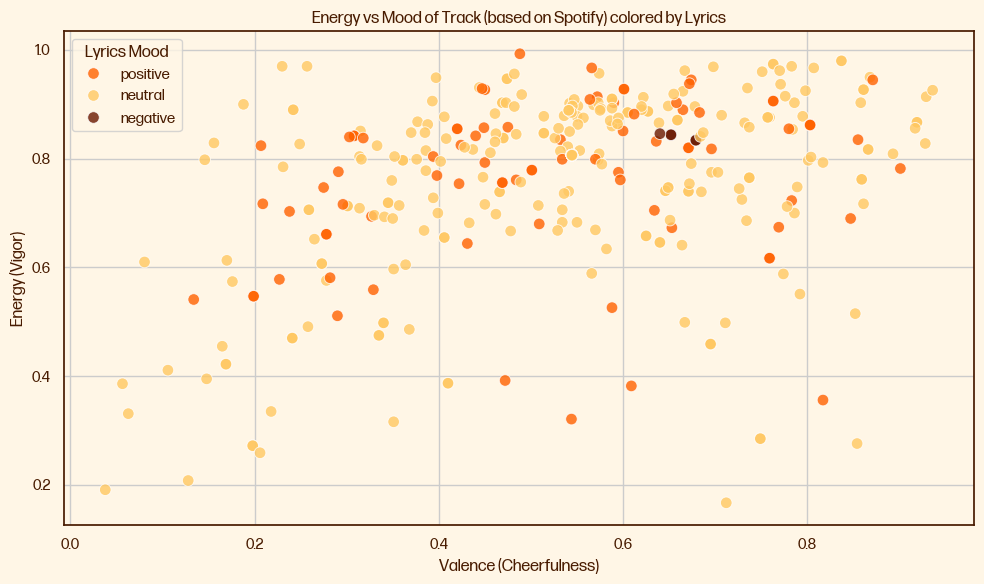

In [675]:
# Красивый scatterplot: Valence vs Energy, цветом по текстовому настроению
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='spotify_track_valence',
    y='spotify_track_energy',
    hue='sentiment_guess',
    palette={'positive': '#FF6200', 'neutral': '#FFC862', 'negative': '#691700'},
    alpha=0.8,
    s=70
)

plt.title('Energy vs Mood of Track (based on Spotify) colored by Lyrics')
plt.xlabel('Valence (Cheerfulness)')
plt.ylabel('Energy (Vigor)')
plt.legend(title='Lyrics Mood')
plt.grid(True)
plt.tight_layout()
plt.show()


### во всех песнях есть позитивные слова, негативных - очень мало, и что забавно, они используются в песнях, которые спотифай отмечает как веселые. это показывает что тексты песен в основном строятся на нейтральной или приподнятой лексике, что впринципе свойственно для кпопа

График 2: Просчитаем исполнителя и настроение песен

/var/folders/fx/hxw23_mn2x17_m7pjjqywrbr0000gn/T/ipykernel_14108/3210047119.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


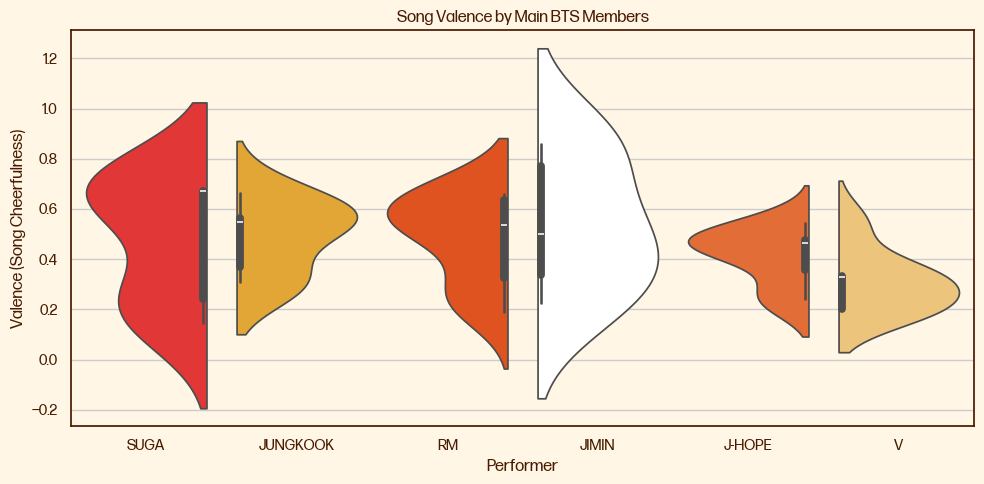

In [676]:
main_members = ['V', 'J-HOPE', 'SUGA', 'RM', 'JIMIN', 'JUNGKOOK']
df_main = df[df['performed_by'].isin(main_members)]

# Sort by median valence
order_main = df_main.groupby('performed_by')['spotify_track_valence'].median().sort_values(ascending=False).index

custom_palette = {
    'V': '#FFCA69',
    'J-HOPE': '#FF621A',
    'SUGA': '#FF1A1A',
    'RM': '#FF4400',
    'JIMIN': '#FFFFFF',
    'JUNGKOOK': '#FFAF1A'
}

# Create a violin plot for the selected members
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df_main,
    x='performed_by',
    y='spotify_track_valence',
    palette=custom_palette,
    order=order_main,
    split=True
)

plt.title('Song Valence by Main BTS Members')
plt.xlabel('Performer')
plt.ylabel('Valence (Song Cheerfulness)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### джимин такой разнообразный!!!! а ви наоборот только и реп и читает(((((

График 3

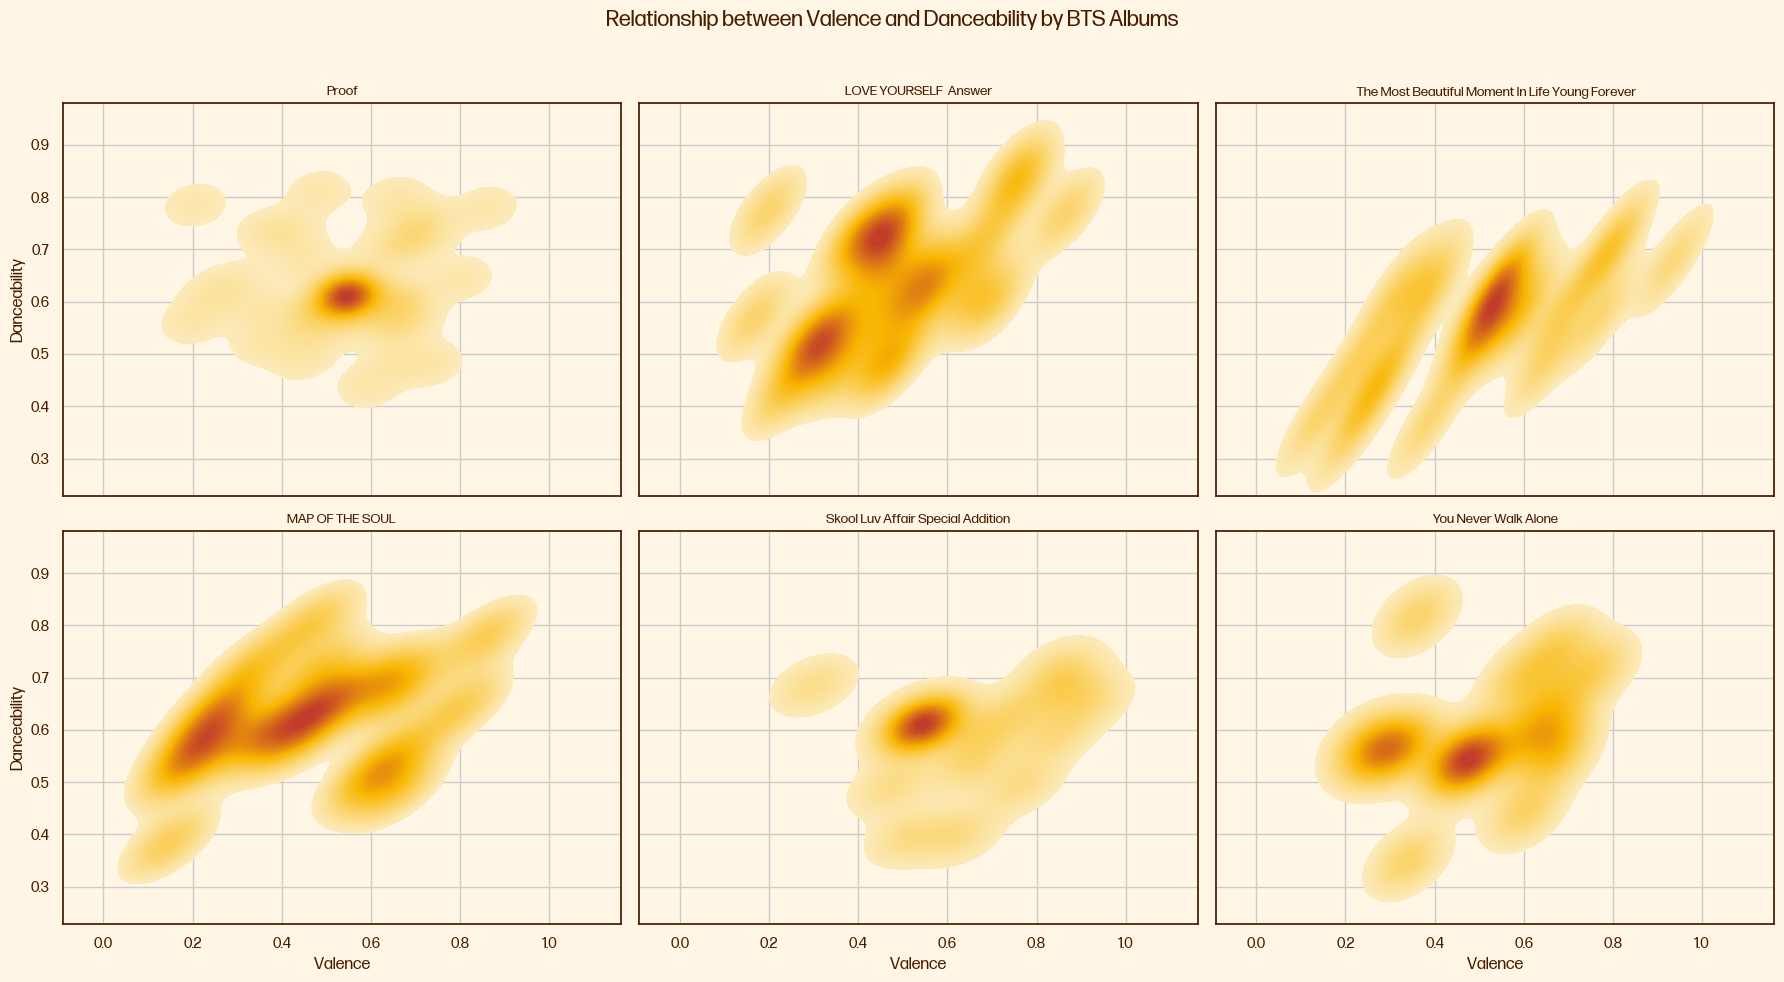

In [677]:
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['album_title'] = df['album_title'].str.replace(r'[^A-Za-z\s]', '', regex=True)

# Prepare data
val_dance_df = df[['album_title', 'spotify_track_valence', 'spotify_track_danceability']].dropna()

# Select top 6 albums by number of tracks
top_albums = val_dance_df['album_title'].value_counts().head(6).index
filtered = val_dance_df[val_dance_df['album_title'].isin(top_albums)]

# Create a custom colormap: from beige to red-orange
warm_cmap = LinearSegmentedColormap.from_list("warm_beige_orange", ["#fceabb", "#f8b500", "#c0392b"])

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, album in zip(axes, top_albums):
    album_data = filtered[filtered['album_title'] == album]
    sns.kdeplot(
        data=album_data,
        x='spotify_track_valence',
        y='spotify_track_danceability',
        fill=True,
        cmap=warm_cmap,
        bw_adjust=0.6,
        thresh=0.05,
        levels=100,
        ax=ax
    )
    ax.set_title(album, fontsize=10)
    ax.set_xlabel("Valence")
    ax.set_ylabel("Danceability")

plt.suptitle("Relationship between Valence and Danceability by BTS Albums", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### proof - самый практически монотонный в плане громкости и эмоций, в то время как map of the soul - очень разнообразен, для каждой эмоции разная громкость

График 4: нарисуем самые частые слова

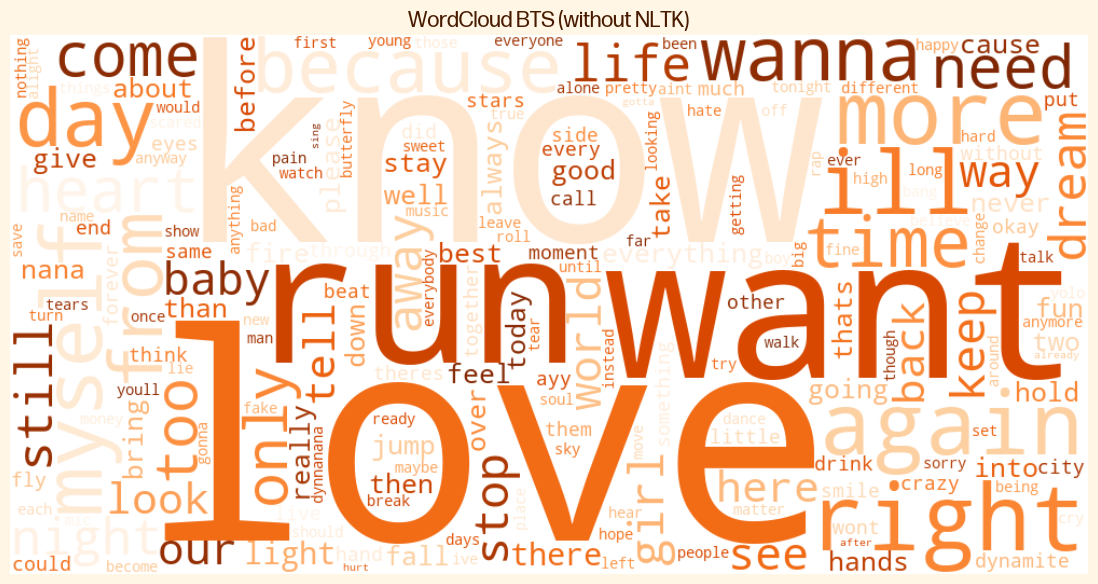

In [678]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

# Собираем все lyrics
all_lyrics = ' '.join(df['lyrics'].dropna().astype(str)).lower()
clean_text = re.sub(r'[^a-z\s]', '', all_lyrics)
tokens = clean_text.split()

# Простейшие стоп-слова
stop_words = {
    'the', 'and', 'you', 'but', 'are', 'for', 'not', 'all', 'can', 'this', 'with', 'that', 'was',
    'your', 'out', 'have', 'has', 'had', 'get', 'got', 'she', 'his', 'her', 'him', 'they', 'say',
    'sayin', 'said', 'let', 'make', 'just', 'like', 'what', 'when', 'why', 'how', 'where', 'who',
    'i', 'me', 'my', 'we', 'us', 'it', 'a', 'an', 'in', 'on', 'at', 'of', 'to', 'so', 'no', 'yes',
    'if', 'as', 'do', 'be', 'is', 'am', 'im', 'dont', 'yeah', 'uh', 'oh', 'ooh', 'la', 'na', 'u', 'its', 'youre', 'even', 'now', 'cant', 'one', 'were', 'lets', 'will', 'hey'
}

# Убираем всё лишнее
filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

# Считаем частоты
word_freq = Counter(filtered_tokens)

# Строим облако
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Oranges')
wordcloud = wordcloud.generate_from_frequencies(word_freq)

# Показываем
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud BTS (without NLTK)", fontsize=16)
plt.show()

ну тип лавки да очень любим любить да

/var/folders/fx/hxw23_mn2x17_m7pjjqywrbr0000gn/T/ipykernel_14108/1648351711.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("valence_category").agg(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


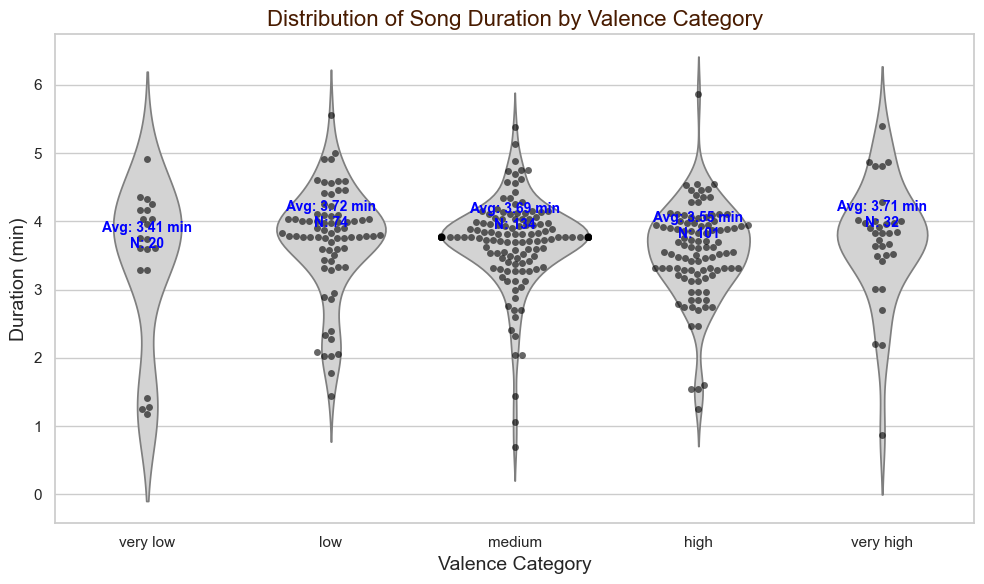

In [679]:
df = df.dropna(subset=["spotify_track_valence", "spotify_track_duration_ms"])

# Определяем 5 категорий для valence
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ["very low", "low", "medium", "high", "very high"]
df["valence_category"] = pd.cut(df["spotify_track_valence"], bins=bins, labels=labels, include_lowest=True)

# Переводим длительность песен из миллисекунд в минуты
df["duration_min"] = df["spotify_track_duration_ms"] / 60000

# Группировка для аннотаций
grouped = df.groupby("valence_category").agg(
    avg_duration_min=("duration_min", "mean"),
    song_count=("duration_min", "count")
).reset_index()

# Настройка темы Seaborn
sns.set_theme(style="whitegrid", palette="viridis")

plt.figure(figsize=(10, 6))

# Violin plot для распределения длительности в каждой категории
sns.violinplot(
    x="valence_category", y="duration_min", data=df,
    inner=None, color="lightgray"
)

# Swarm plot для отображения каждой песни
sns.swarmplot(
    x="valence_category", y="duration_min", data=df,
    color="black", alpha=0.6
)

# Аннотации: средняя длительность и количество песен
for i, row in grouped.iterrows():
    plt.text(
        i, row["avg_duration_min"] + 0.2,
        f"Avg: {row['avg_duration_min']:.2f} min\nN: {row['song_count']}",
        horizontalalignment="center",
        fontsize=10, color="blue", weight="bold"
    )

plt.title("Distribution of Song Duration by Valence Category", fontsize=16)
plt.xlabel("Valence Category", fontsize=14)
plt.ylabel("Duration (min)", fontsize=14)
plt.tight_layout()
plt.show()
